In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


<h1>Tabular Playground Series - May 2022</h1>

The May edition of the 2022 Tabular Playground series binary classification problem that includes a number of different feature interactions. This competition is an opportunity to explore various methods for identifying and exploiting these feature interactions.

For this challenge, you are given (simulated) manufacturing control data and are tasked to predict whether the machine is in state 0 or state 1. The data has various feature interactions that may be important in determining the machine state.

<h1>1 Exploratory data analysis</h1>

<h2>1.1 Train Set</h2>

In [2]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')

In [3]:
train_df.shape

(900000, 33)

In [4]:
train_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [5]:
train_df.tail()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
899995,899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0
899998,899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,...,2.423670,2.110008,0.561271,-2.149610,1.019982,ADBAAADDAE,47.823039,1,2,0
899999,899999,-0.636210,-0.425986,-1.826699,-0.598797,1.589577,-0.482298,-0.214093,7,1,...,1.340696,3.762351,1.797137,-0.412837,2.090440,BCAACADSCE,-44.559296,0,2,1


In [6]:
train_df.drop('id', axis=1, inplace=True)

In [7]:
pd.value_counts(train_df.dtypes)

float64    16
int64      15
object      1
dtype: int64

In [8]:
train_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,900000.0,2.362431,1.637706,0.000000,1.000000,2.000000,3.000000,14.000000


In [9]:
train_df.describe(exclude='number').T

,count,unique,top,freq
f_27,900000,741354,BBBBBBCJBC,12


<AxesSubplot:title={'center':'Unique Values per feature'}>

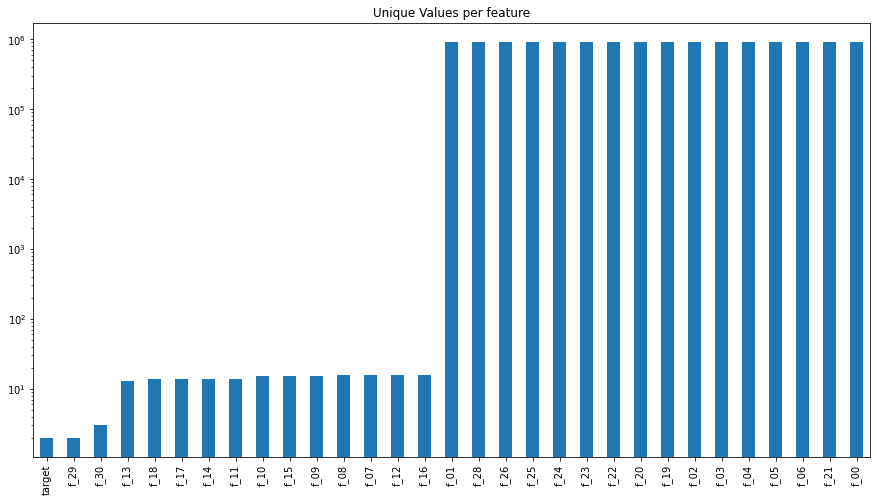

In [10]:
unique_values = train_df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

<AxesSubplot:title={'center':'Unique Values per feature'}>

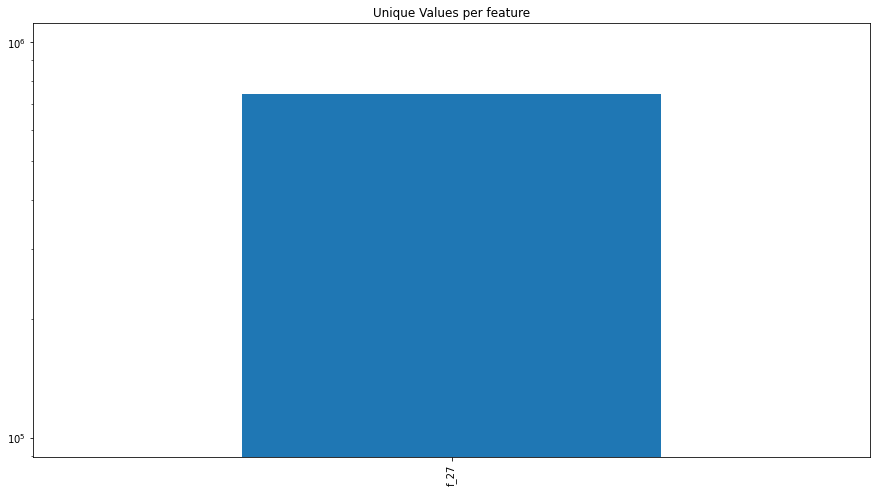

In [11]:
unique_values = train_df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

In [12]:
n_duplicates = train_df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [13]:
n_duplicates = train_df.drop('target', axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [14]:
missing = train_df.isnull().sum()
print(f"Missing values per feature: {missing}")

Missing values per feature: f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64


array([[<AxesSubplot:title={'center':'f_00'}>,
        <AxesSubplot:title={'center':'f_01'}>,
        <AxesSubplot:title={'center':'f_02'}>,
        <AxesSubplot:title={'center':'f_03'}>,
        <AxesSubplot:title={'center':'f_04'}>],
       [<AxesSubplot:title={'center':'f_05'}>,
        <AxesSubplot:title={'center':'f_06'}>,
        <AxesSubplot:title={'center':'f_07'}>,
        <AxesSubplot:title={'center':'f_08'}>,
        <AxesSubplot:title={'center':'f_09'}>],
       [<AxesSubplot:title={'center':'f_10'}>,
        <AxesSubplot:title={'center':'f_11'}>,
        <AxesSubplot:title={'center':'f_12'}>,
        <AxesSubplot:title={'center':'f_13'}>,
        <AxesSubplot:title={'center':'f_14'}>],
       [<AxesSubplot:title={'center':'f_15'}>,
        <AxesSubplot:title={'center':'f_16'}>,
        <AxesSubplot:title={'center':'f_17'}>,
        <AxesSubplot:title={'center':'f_18'}>,
        <AxesSubplot:title={'center':'f_19'}>],
       [<AxesSubplot:title={'center':'f_20'}>,
        <

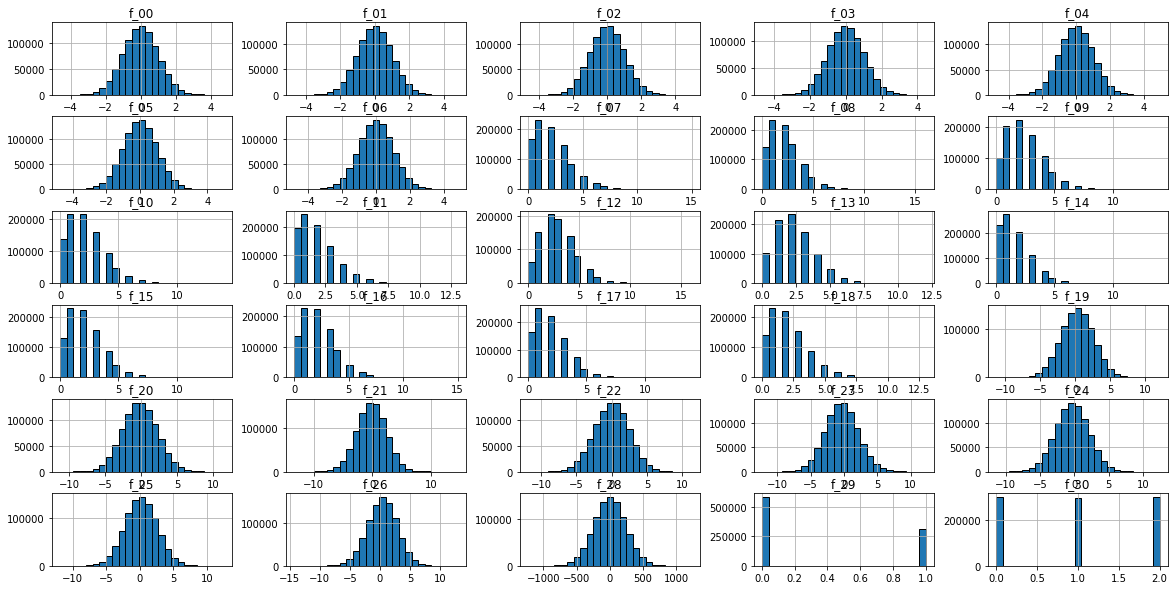

In [15]:
train_df.drop('target', axis=1).hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')

<AxesSubplot:>

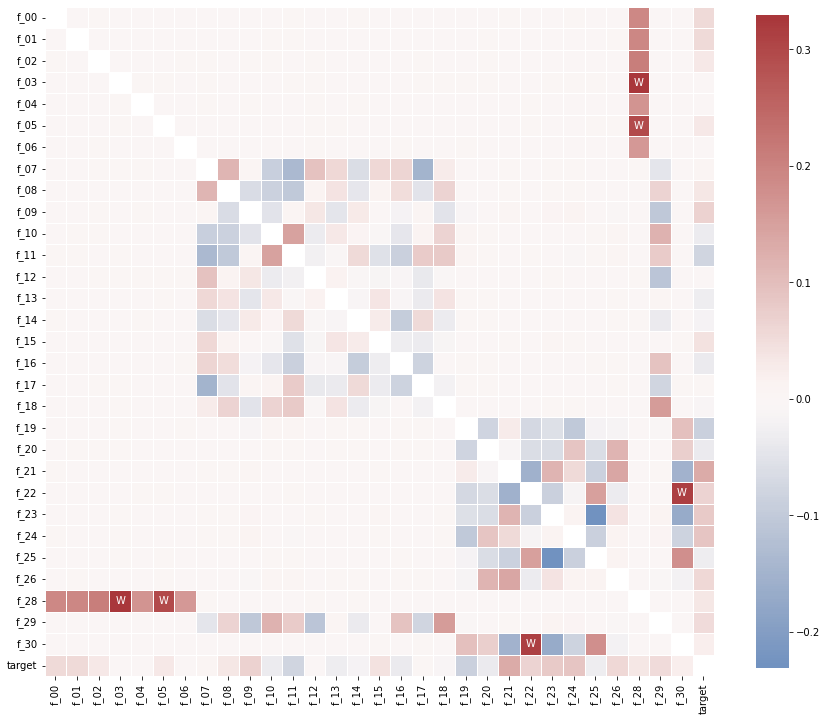

In [16]:


df_corr = train_df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(df_corr, mask=np.eye(len(df_corr)),
            square=True,
            center=0,
            annot=labels,
            fmt='',
            linewidths=0.5,
            cmap="vlag",
            cbar_kws={"shrink": 0.8}
           )


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

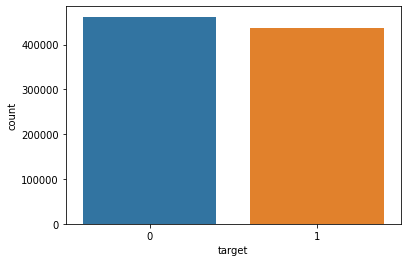

In [17]:
sns.countplot(train_df['target'])

In [18]:
train_df['target'].value_counts()

0    462161
1    437839
Name: target, dtype: int64

In [19]:
train_df['target'].value_counts()/len(train_df) * 100

0    51.351222
1    48.648778
Name: target, dtype: float64

<h3>1.1.1 Train Set EDA Conclusion</h3>

The train set contains 900000 samples with 33 features, where 16 of them are fo type float64, 15 of type int64 and 1 of type object. The only feature of type object has values that are sequences of characters that encodes some information that might be useful when properly encoded. There are 741354 unique values for this variable.  

There are no duplicated values nor missing values. The features f00 through f06 and f19-f28 have a normal distribution. The other features are right skewed. None of these features have high correlation with each other.

The target variable is well balanced with 51.35% of zeroes and 48.65% of ones.

In [20]:
del train_df
gc.collect()

108

<h2>1.2 Test Set</h2>

In [21]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')

In [22]:
test_df.shape

(700000, 32)

In [23]:
test_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [24]:
test_df.tail()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
699995,1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,...,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,BCBCEBHMCD,204.186539,0,0
699996,1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,...,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,BAABCADQFC,-97.694591,0,2
699997,1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,...,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,AAAJCBGQBA,130.622745,1,0
699998,1599998,-2.031073,-1.238398,0.964699,-1.045950,0.906064,0.634301,-0.707474,5,1,...,1.453864,-1.696606,1.018995,1.973697,-0.353068,-3.333449,BCBBCABNDE,-364.625148,0,0
699999,1599999,-0.085906,-0.002124,2.227375,0.217145,3.179153,-1.660188,0.891989,0,3,...,-3.549082,-4.325318,-5.017221,0.251268,-3.236026,-0.362070,AFBEBACHFF,-155.417342,0,1


In [25]:
test_df.drop('id', axis=1, inplace=True)

In [26]:
pd.value_counts(test_df.dtypes)

float64    16
int64      14
object      1
dtype: int64

In [27]:
test_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
f_00,700000.0,-0.000087,1.000264,-4.658018,-0.675708,-0.000395,0.675788,5.761950
f_01,700000.0,-0.000732,0.997131,-4.922718,-0.674040,-0.000241,0.671415,4.768073
f_02,700000.0,-0.000385,1.000317,-4.457561,-0.675961,-0.000723,0.673105,4.599902
f_03,700000.0,0.000705,1.001758,-4.567419,-0.674561,-0.000294,0.676376,4.899904
f_04,700000.0,0.000800,0.999088,-4.675301,-0.674696,0.000276,0.674542,4.494312
f_05,700000.0,-0.000468,1.000249,-5.141356,-0.674444,-0.001674,0.674146,4.701004
f_06,700000.0,0.002550,0.999536,-4.782164,-0.671481,0.002623,0.676590,4.673145
f_07,700000.0,2.030819,1.655909,0.000000,1.000000,2.000000,3.000000,16.000000
f_08,700000.0,2.056923,1.591726,0.000000,1.000000,2.000000,3.000000,13.000000
f_09,700000.0,2.361191,1.636695,0.000000,1.000000,2.000000,3.000000,16.000000


In [28]:
test_df.describe(exclude='number').T

,count,unique,top,freq
f_27,700000,598482,BCBCBBCTBC,9


<AxesSubplot:title={'center':'Unique Values per feature'}>

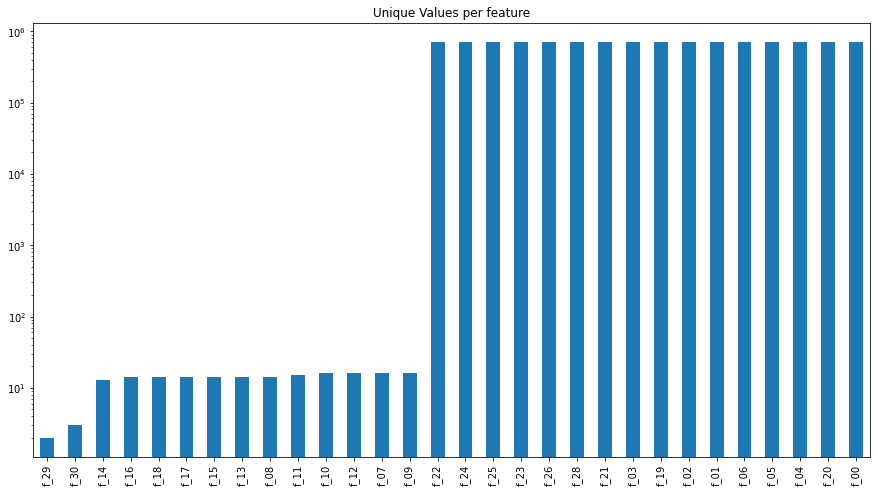

In [29]:
unique_values = test_df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

<AxesSubplot:title={'center':'Unique Values per feature'}>

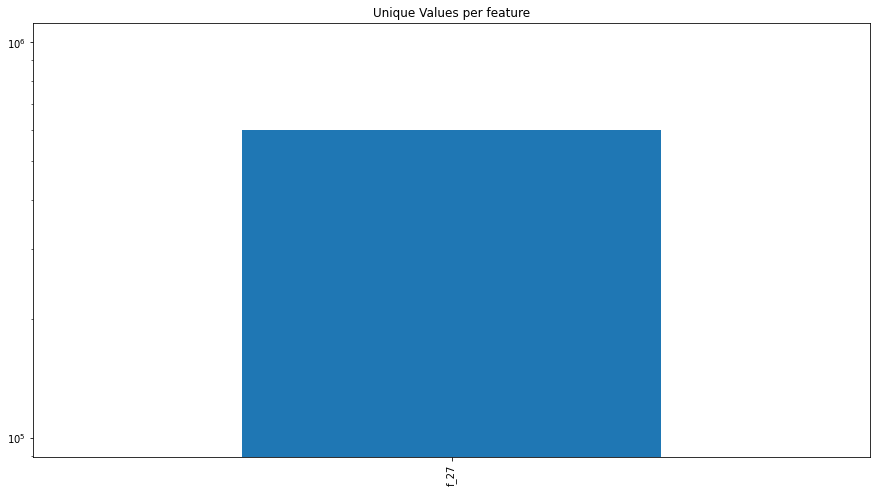

In [30]:
unique_values = test_df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

In [31]:
n_duplicates = test_df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [32]:
missing = test_df.isnull().sum()
print(f"Missing values per feature: {missing}")

Missing values per feature: f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
f_29    0
f_30    0
dtype: int64


array([[<AxesSubplot:title={'center':'f_00'}>,
        <AxesSubplot:title={'center':'f_01'}>,
        <AxesSubplot:title={'center':'f_02'}>,
        <AxesSubplot:title={'center':'f_03'}>,
        <AxesSubplot:title={'center':'f_04'}>],
       [<AxesSubplot:title={'center':'f_05'}>,
        <AxesSubplot:title={'center':'f_06'}>,
        <AxesSubplot:title={'center':'f_07'}>,
        <AxesSubplot:title={'center':'f_08'}>,
        <AxesSubplot:title={'center':'f_09'}>],
       [<AxesSubplot:title={'center':'f_10'}>,
        <AxesSubplot:title={'center':'f_11'}>,
        <AxesSubplot:title={'center':'f_12'}>,
        <AxesSubplot:title={'center':'f_13'}>,
        <AxesSubplot:title={'center':'f_14'}>],
       [<AxesSubplot:title={'center':'f_15'}>,
        <AxesSubplot:title={'center':'f_16'}>,
        <AxesSubplot:title={'center':'f_17'}>,
        <AxesSubplot:title={'center':'f_18'}>,
        <AxesSubplot:title={'center':'f_19'}>],
       [<AxesSubplot:title={'center':'f_20'}>,
        <

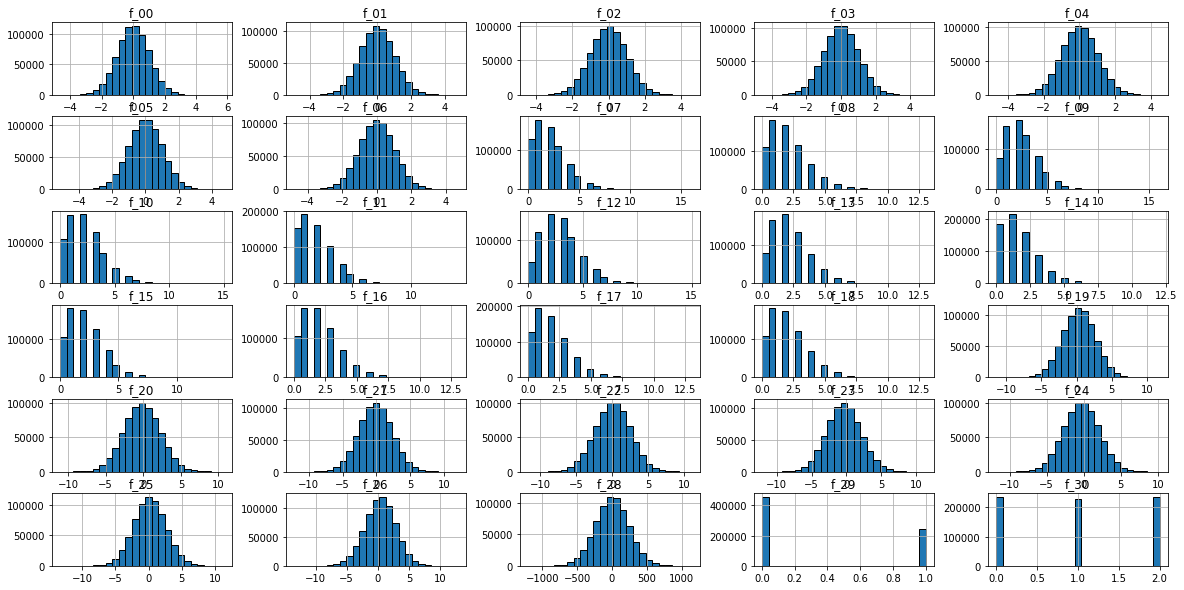

In [33]:
test_df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')

<AxesSubplot:>

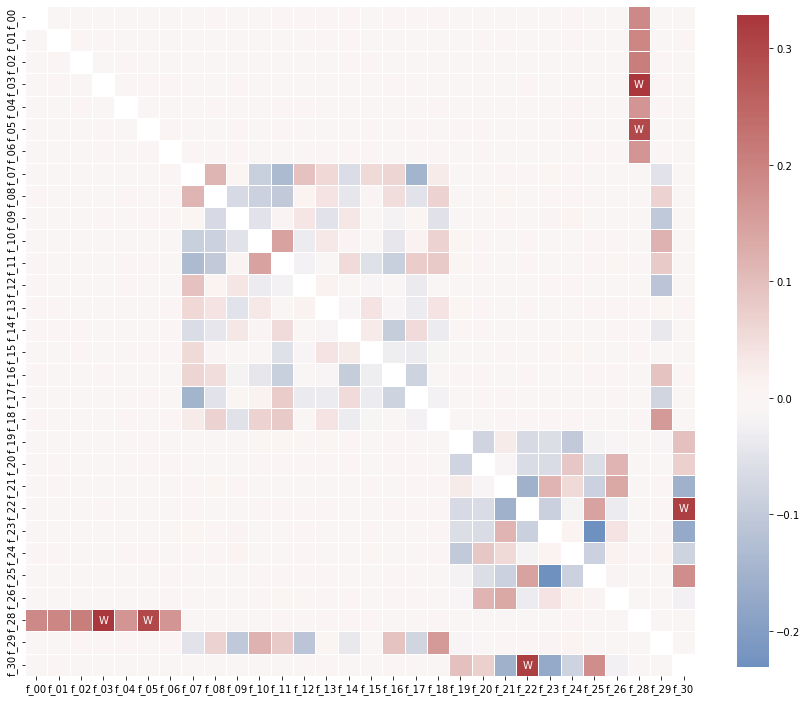

In [34]:
df_corr = test_df.corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15, 15))

sns.heatmap(df_corr, mask=np.eye(len(df_corr)),
            square=True,
            center=0,
            annot=labels,
            fmt='',
            linewidths=0.5,
            cmap="vlag",
            cbar_kws={"shrink": 0.8}
           )

In [35]:
del test_df
gc.collect()

71

<h3>1.2.1 Test Set EDA Conclusion</h3>

Same conclusions of the train set. Both sets have similar characteristics.